In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb

#plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

### Это я уже показывал (считаю $\widehat p$ по-разному)

In [3]:
n = 1000; 

In [4]:
def my_chi_sq(theta1):
    return (282 - n * theta1)**2 / (n * theta1) + (579 - n * 2 * theta1)**2 / (n *2* theta1) + \
((n - 282 - 579) - n * (1 - 3 * theta1))**2 / (n * (1 - 3 * theta1))

def likelihood(theta1):
    return 282 * np.log(n * theta1) + 579 * np.log(n * 2 * theta1) +  (n - 282  - 579) * np.log(n * (1 - 3 * theta1))

      fun: array([-5592.56784643])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4981.81780393])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([0.15])


<ipython-input-4-3e01409a61b7>:6: RuntimeWarning: divide by zero encountered in log
  return 282 * np.log(n * theta1) + 579 * np.log(n * 2 * theta1) +  (n - 282  - 579) * np.log(n * (1 - 3 * theta1))
<ipython-input-4-3e01409a61b7>:6: RuntimeWarning: invalid value encountered in log
  return 282 * np.log(n * theta1) + 579 * np.log(n * 2 * theta1) +  (n - 282  - 579) * np.log(n * (1 - 3 * theta1))


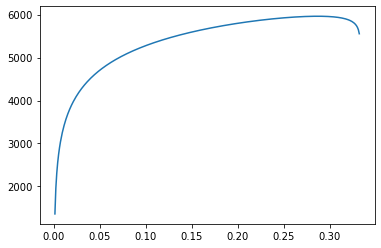

0.28703703703703703


<ipython-input-4-3e01409a61b7>:6: RuntimeWarning: invalid value encountered in log
  return 282 * np.log(n * theta1) + 579 * np.log(n * 2 * theta1) +  (n - 282  - 579) * np.log(n * (1 - 3 * theta1))
<ipython-input-4-3e01409a61b7>:6: RuntimeWarning: invalid value encountered in log
  return 282 * np.log(n * theta1) + 579 * np.log(n * 2 * theta1) +  (n - 282  - 579) * np.log(n * (1 - 3 * theta1))


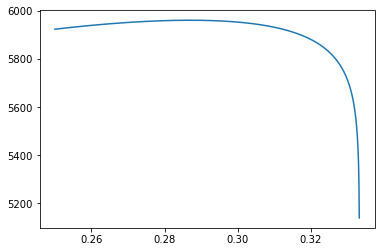

In [5]:

fun = lambda x: -likelihood(x)

bnds = ((0, 1/3),)
OMP = opt.minimize(fun, 0.15, bounds = bnds, method = 'L-BFGS-B')
print(OMP)
x_axis = np.linspace(0, 1, 1000)
plt.plot(x_axis, likelihood(x_axis))

x_axis = np.linspace(0.25, 0.35, 1000)
plt.show()
plt.plot(x_axis, likelihood(x_axis))

min_theta = 0.282
for i in x_axis:
    if (likelihood(i) > likelihood(min_theta)):
        min_theta = i;

print(min_theta)


In [6]:
my_chi_sq(min_theta) 

0.13074838709677428

In [7]:
stat.chi2.ppf(1 - 0.05, 1)

3.841458820694124

значение получилось близкое к теоретическому:

$\ln L = \nu_1 * \ln(\theta_1) + \nu_2 * \ln(2\theta_1) + (n - \nu_1 - \nu_2) * \ln(1 - 3\theta_1)$

$\displaystyle \frac{\partial \ln L}{\partial \theta_1} = \frac{\nu_1}{\theta_1} 
+ \frac{\nu_2}{\theta_1} - 3 \frac{n - \nu_1 -\nu_2}{1 - 3 \theta_1} = 0
$

$
(1 - 3 \theta_1) * (\nu_1 + \nu_2) - 3 * (n - \nu_1 - \nu_2) \theta_1 = 0
$

In [8]:
print('estimate =', min_theta, 'real =', (282 + 579) / (3 * n))

estimate = 0.28703703703703703 real = 0.287


In [9]:
print(stat.chisquare([282/n, 579/n, (n - 282 - 579)/n], [0.287, 2 * 0.287, 1 - 3 * 0.287], ddof = 1).pvalue)

0.9908797805286206


### Теперь построим графики для p-value (это я еще не показывал)

In [10]:
hat_p = 0.287
samplesize = 1000

[0.276 0.578 0.146]


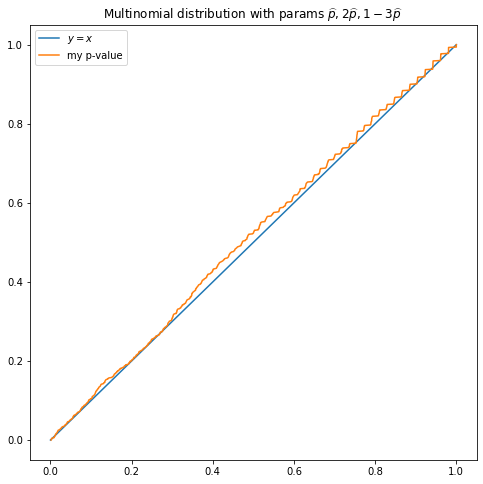

In [15]:
p_array = []
for i in range(1000):
    sample = stat.multinomial(samplesize, [hat_p, 2 * hat_p, 1 - 3 * hat_p]).rvs()[0]
    new_hat_p = (sample[0] + sample[1]) / 3
    p_array.append(stat.chisquare(sample, [new_hat_p, 2 * new_hat_p, samplesize - 3 * new_hat_p], ddof = 1).pvalue)
    #stat.chisquare(sample/1000, [0.287, 2 * 0.287, 1 - 3 * 0.287], ddof = 1).pvalue)
    
x_axis = np.linspace(0, 1, 1000)
p_array = sorted(p_array)
print(sample / samplesize)
plt.figure(figsize = (8,8))
plt.plot(x_axis, x_axis, label = '$y = x$')
plt.plot(p_array, x_axis, label = 'my p-value')
plt.legend()
plt.title('Multinomial distribution with params $\\widehat{p}, 2\\widehat{p}, 1 - 3\\widehat{p}$')
plt.show()

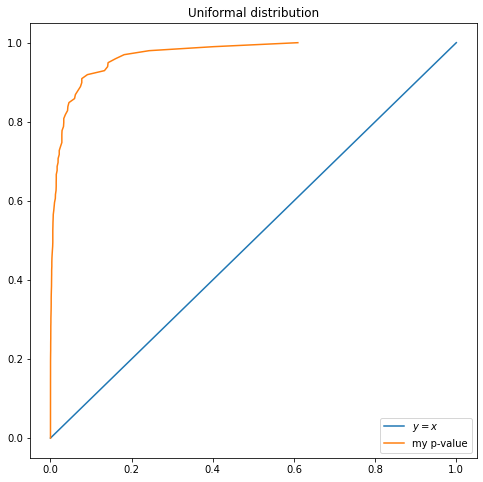

In [37]:
p_array = []
samplesize = 100
for i in range(100):
    sample_precursor = list(stat.randint(0, 3).rvs(samplesize))
    sample = np.array([sample_precursor.count(0), sample_precursor.count(1), sample_precursor.count(2)])
    #print(sample)
    new_hat_p = (sample[0] + sample[1]) / 3
    p_array.append(stat.chisquare(sample, [new_hat_p, 2 * new_hat_p, samplesize - 3 * new_hat_p], ddof = 1).pvalue)
    #stat.chisquare(sample/1000, [0.287, 2 * 0.287, 1 - 3 * 0.287], ddof = 1).pvalue)
    
x_axis = np.linspace(0, 1, 100)
p_array = sorted(p_array)
#print(p_array)
plt.figure(figsize = (8,8))
plt.plot(x_axis, x_axis, label = '$y = x$')
plt.plot(p_array, x_axis, label = 'my p-value')
plt.legend()
plt.title('Uniformal distribution')
plt.show()

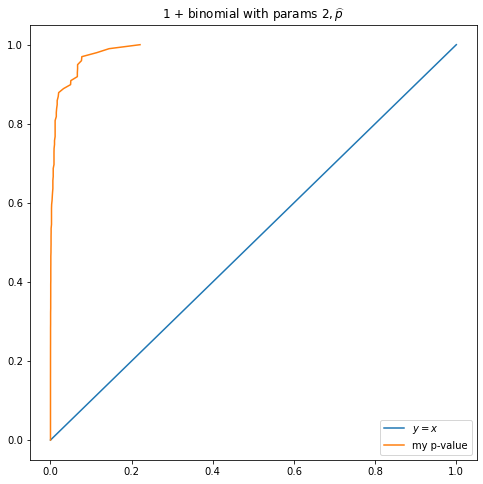

In [41]:
p_array = []
samplesize = 50
for i in range(100):
    sample_precursor = list(stat.binom(2, hat_p).rvs(samplesize))
    sample = np.array([sample_precursor.count(0), sample_precursor.count(1), sample_precursor.count(2)])
    new_hat_p = (sample[0] + sample[1]) / 3
    p_array.append(stat.chisquare(sample, [new_hat_p, 2 * new_hat_p, samplesize - 3 * new_hat_p], ddof = 1).pvalue)
    #print(sample)
    
x_axis = np.linspace(0, 1, 100)
p_array = sorted(p_array)
#print(p_array)
plt.figure(figsize = (8,8))
plt.plot(x_axis, x_axis, label = '$y = x$')
plt.plot(p_array, x_axis, label = 'my p-value')
plt.legend()
plt.title('1 + binomial with params $2, \\widehat{p}$')
plt.show()

### Замечу, что при размере выборки в 1000 p-value становится крайне близким к тождественному нулю